<h1 style="text-align:center;">Tarea 5: Herramientas matemáticas con aplicaciones en física</h1>
<h2 style="text-align:center;">Ángel Fabricio Aguirre Bermúdez - C10152</h2>

## Parte I

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

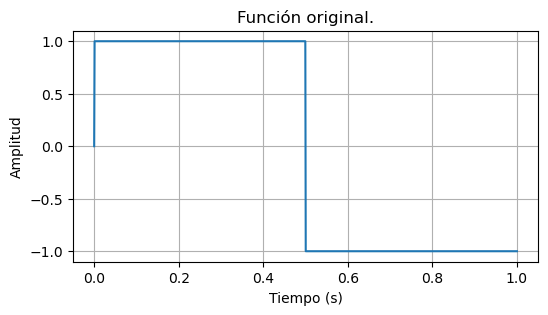

In [2]:
def func_cuadrada(f, t):
    return np.sign(np.sin(2*np.pi * f*t))

N = 1000
f = 1 #Se escoge f = 1, -> T = 1/f = 1
t_vals = np.linspace(0,1*(1/f),N) # Un periodo
g_vals= func_cuadrada(f, t_vals)

plt.figure(figsize=(6, 3))
plt.plot(t_vals, g_vals)
plt.title('Función original.')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid()
plt.show()

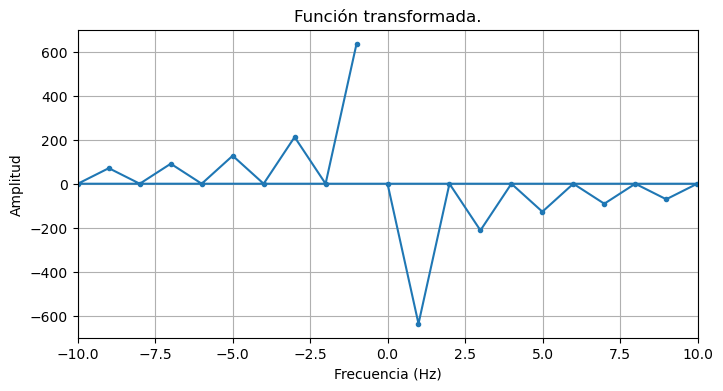

In [5]:
# Transformada de Fourier
G_vals = np.fft.fft(func_cuadrada(f, t_vals))
omega_vals = np.fft.fftfreq(len(G_vals), d=t_vals[1]-t_vals[0]) # Dominio de frecuencias/espacio dual

plt.figure(figsize=(8, 4))
plt.xlim(-N//100,N//100)
plt.plot(omega_vals, np.imag(G_vals), '.-')
plt.title('Función transformada.')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.grid()
plt.show()

Se observa picos en $\omega=1,3,5,... = 1f_0,3f_0,5f_0,...$ Esto concuerda con lo esperado, ya que, para una frecuencia dada ($f_0=1/T$), la transforma de Fourier para esta función es:

\begin{align}
f(t) = \text{sgn}\left[ \sin(2\pi f_0 t )\right]= \frac{a_0}{2} + \sum_{n=0}^{\infty}\left[a_n \cos\left(2\pi n f_0 x\right) + b_n\sin\left(2\pi n f_0x\right)\right].
\end{align}

donde $a_n = 0$ ya que la función es impar, y por lo tanto no puede estar compuesta por cosenos (pares). Para $b_n$:

\begin{equation}
b_n = \frac{2}{T} \int_{0}^{T} g(t) \sin(2\pi n f_0 t) \, dt = \frac{2}{T} \left[ \int_{0}^{\frac{T}{2}} \sin(2\pi n f_0 t) \, dt - \int_{\frac{T}{2}}^{T} \sin(2\pi n f_0 t) \, dt \right] = \frac{4}{T} \int_{0}^{\frac{T}{2}} \sin(2\pi n f_0 t) \, dt
\end{equation}

\begin{equation}
\Rightarrow b_n = \frac{4}{T} \cdot  \left[ -\frac{1}{2\pi n f_0} \cos(2\pi n f_0 t) \right]_0^{\frac{T}{2}}= \frac{4}{T} \cdot -\frac{1}{2\pi n f_0} \left[ (-1)^n - 1 \right] = 
\begin{cases} 
\frac{4}{\pi n}&  n\text{ impar}\\
0 & n \text{ par}
\end{cases}
\end{equation}

De manera que para que la transformada no sea nula, $n=1,3,5,...$ (armónicos impares).

\begin{align}
\Rightarrow f(t) = b_1\sin\left(2\pi (1 f_0) x\right) +b_2\sin\left(2\pi (3 f_0) x\right) +b_5\sin\left(2\pi (5 f_0) x\right)+...
\end{align}

Finalmente, se observa que las frecuencias son las encontradas en la transformada.

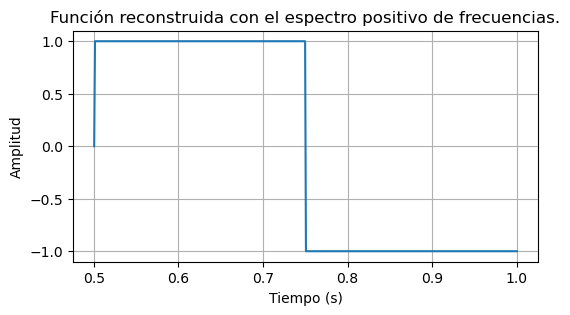

In [7]:
# Se utilizará la mitad izquierda:
G_vals_izq = G_vals[N//2:]
g_reconstruida_izq = np.fft.ifft(G_vals_izq).real # Transformada inversa

plt.figure(figsize=(6, 3))
plt.plot(t_vals[N//2:], g_reconstruida_izq)
plt.title('Función reconstruida con el espectro positivo de frecuencias.')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid()
plt.show()

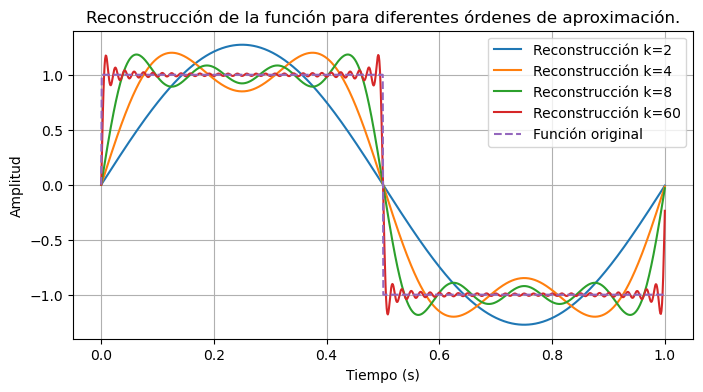

In [9]:
valores_k = [2, 4, 8, 60]
G_vals_k = np.zeros_like(G_vals)
plt.figure(figsize=(8, 4))

for k in valores_k:
    # Copiar los primeros y últimos 'k' (orden de aproximación, cuantos términos de la sumatoria quiero)
    G_vals_k[:k] = G_vals[:k]
    G_vals_k[-k:] = G_vals[-k:]
    
    g_reconstruida_k = np.fft.ifft(G_vals_k).real
    plt.plot(t_vals, g_reconstruida_k, label=f'Reconstrucción k={k}') # Graficar la reconstrucción

plt.plot(t_vals, g_vals, '--', label='Función original')  
plt.title('Reconstrucción de la función para diferentes órdenes de aproximación.')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()
plt.show()

Como se observó anterormente, en el espacio de la transformada, $f_0$ es la frecuercia con mayor amplitud:

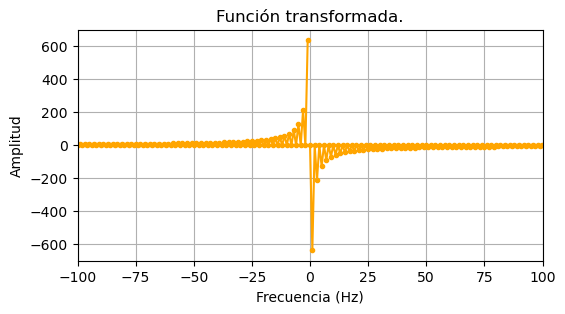

In [11]:
plt.figure(figsize=(6, 3))
plt.xlim(-N//10,N//10)
plt.plot(omega_vals, np.imag(G_vals), '.-', color="orange")
plt.title('Función transformada.')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.grid()
plt.show()

De manera que el primer orden de aproximacón es el que más contribuye, y los siguientes términos llegan a reducir el error de la aproximación, que es justamente lo que se observa en la reconstrucción de la función para diferentes órdenes de aproximación.

## Parte II

### Implicaciones al incluir densidades de carga

Se presenta el siguiente problema:

\begin{equation}
 \nabla^2 \phi  = \frac{\partial^2 \phi}{\partial x^2} + \frac{\partial^2 \phi}{\partial y^2} = -\frac{\rho(x,y)}{\epsilon_0} \quad \quad (1)
\end{equation}


Al utilizar diferencias centrales, la segunda derivada toma la forma:

$$
f''(x) \approx  \frac{f(x + h) - 2f(x) + f(x - h)}{h^2}
$$

De manera que la ecuación 1 se transforma en:

$$
\frac{\phi(x+a, y) + \phi(x-a, y) + \phi(x, y+a) + \phi(x, y-a) - 4\phi(x, y)}{a^2} \approx -\frac{\rho(x,y)}{\epsilon_0} 
$$

donde $a$ sigue siendo la subdivisión del espacio.

Dicho esto, es fácil notar que la ecuación del Método de relajación de Jacobi corresponde a:

$$
\phi'(x, y) = \frac{1}{4}\left[\phi(x+a, y) + \phi(x-a, y) + \phi(x, y+a) + \phi(x, y-a) + \frac{a^2\rho(x,y)}{\epsilon_0} \right]
$$

Al compararlo con el caso del laboratorio, se nota que la única diferencia es el término $a^2\rho/\epsilon_0$,  que en el laboratorio se consideraba nulo.


### Implementación del método relajación de Jacobi

Ya que en el problema solicitado, tanto el tamaño lineal del capacitor cuadrado como el de la grilla cuadrada corresponden a $100$, entonces $a=1$. Además, se pide que $\epsilon_0=1$. Por lo tanto la  ecuación a tomar en consideración para esta implementación es:

$$
\phi'(x, y) = \frac{1}{4}\left[\phi(x+1, y) + \phi(x-1, y) + \phi(x, y+1) + \phi(x, y-1) +\rho(x,y) \right]
$$


Es importante notar la naturaleza matricial de $\rho(x,y)$, que según el problema corresponde a:

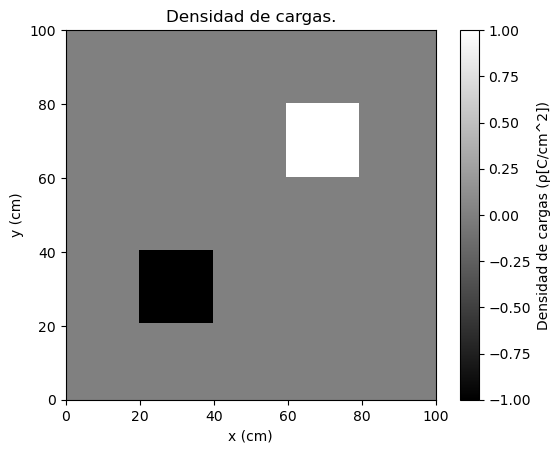

In [13]:
N = 100 # Tamaño lineal de la grilla cuadrada (NxN)
L = 100 # Tamaño lineal del capacitor cuadrado (LxL)
rho = np.zeros((N + 1, N + 1), dtype=float)
rho[int((N/L)*20):int((N/L)*40), int((N/L)*60):int((N/L)*80)] = 1
rho[int((N/L)*60):int((N/L)*80), int((N/L)*20):int((N/L)*40)] = -1 

plt.imshow(rho, extent=[0, 100, 0, 100])
plt.gray()
plt.colorbar(label='Densidad de cargas (ρ[C/cm^2])')
plt.title('Densidad de cargas.')
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.show()

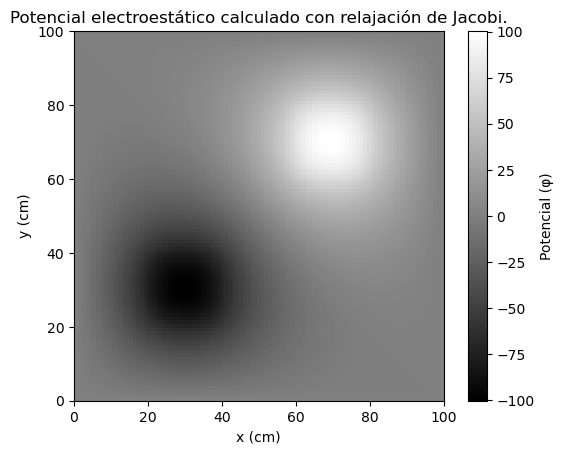

Convergió en 7353 iteraciones.


In [15]:
def jacobi_relaxation(rho, N=100, tolerance=1e-5, L=100):
    phi = np.zeros((N + 1, N + 1), dtype=float) # Iniciación de phi
    '''
    En el código del profe, usar x=y crea copias superficiales (shallow copies), lo que causa problemas al 
    trabajar sobre el MISMO espacio en memoria. Para solucionarlo, usaré phinew (en vez de intercambiar phi 
    y phiprime), almacenando solo la siguiente iteración y comparándola con la anterior.
    '''
    delta = 1.0
    its = 0    
    while delta > tolerance:
        its += 1
        phi_new = phi.copy() # Creo una copia (DEEP COPY) para el estado futuro

        phi_new[1:N, 1:N] = (1.0/4.0) * (phi[2:N + 1, 1:N] + phi[0:N - 1, 1:N] + 
                                         phi[1:N, 2:N + 1] + phi[1:N, 0:N - 1] + rho[1:N, 1:N])
        '''
        phiprime[1:N, 1:N] utiliza slicing de arrays para vectorizar con NumPy, mejorando la eficiencia frente 
        a bucles anidados. Recorro toda la grilla, excluyendo los bordes. Para obtener phi[i+1, j], simplemente 
        sumo 1 en la primera entrada: phi[2:N+1, 1:N].
        '''
        delta = np.max(np.abs(phi - phi_new)) # Con delta se evalua si la solución se estabiliza
        
        phi = phi_new # Se guarda el valor de phiprime como el valor "presente" para la siguiente iteracion (phi)
        
    return phi, its

jacobi_vals, iterations = jacobi_relaxation(rho)

plt.imshow(jacobi_vals, extent=[0, 100, 0, 100])
plt.gray()
plt.colorbar(label='Potencial (φ)')
plt.title('Potencial electroestático calculado con relajación de Jacobi.')
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.show()

print(f"Convergió en {iterations} iteraciones.")

### Implementación del método Gauss Seidel

Para este método se busca ir sobreescribiendo $\phi$, actualizando el valor viejo de inmediato, de manera que la ecuación correspondiente es:

$$
\phi(x, y) \leftarrow \frac{1}{4}\left[\phi(x+1, y) + \phi(x-1, y) + \phi(x, y+1) + \phi(x, y-1) +\rho(x,y) \right]
$$


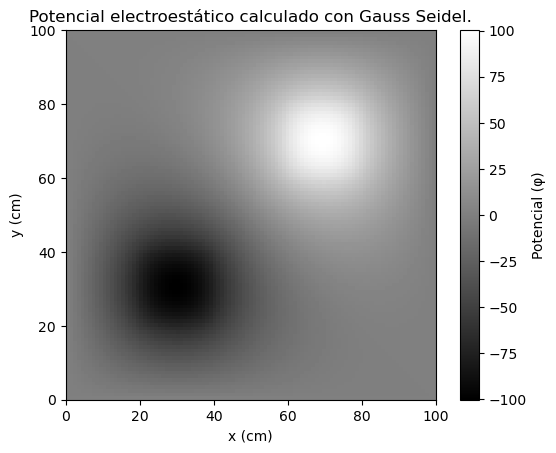

Convergió en 3958 iteraciones.


In [17]:
def gauss_seidel(rho, N=100, tolerance=1e-5, L=10):
    phi = np.zeros((N + 1, N + 1), dtype=float)
    
    phi_copy = phi.copy() # Copia para evaluar el error
    
    delta = 1.0
    its = 0
    while delta > tolerance:
        its += 1
        
        # Itero. Aca debo usar for loops, para aseguarme de que los accesos se realicen entrada por entrada
        # de forma ordenada, ya que Gauss-Seidel depende de la actualización inmediata de los valores intermedios,
        # y el array slicing implica una actualizacion simultanea (util pero en Jacobi).
        for i in range(1,N):
            for j in range(1,N):
                phi[i, j] = (1.0/4.0) * (phi[i+1, j] + phi[i-1, j] + phi[i, j+1] + phi[i, j-1] + rho[i, j])

        delta = np.max(np.abs(phi - phi_copy)) # Con delta se evalua si la solución se estabiliza

        phi_copy = phi.copy() # Copiamos los valores de la nueva iteración

        if its > 8000:
            print("puta")
            break
    return phi, its

gauss_vals, iterations = gauss_seidel(rho)

plt.imshow(gauss_vals, extent=[0, 100, 0, 100])
plt.gray()
plt.colorbar(label='Potencial (φ)')
plt.title('Potencial electroestático calculado con Gauss Seidel.')
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.show()

print(f"Convergió en {iterations} iteraciones.")

El número de iteraciones bajo Gauss Seidel es casi la mitad del presentado bajo relajación de Jacobi, probando que la solución se estabiliza antes. De todas manera, debido a la necesidad de los for loops, toma mucho más tiempo en calcular dichas iteraciones.